In [4]:
from sklearn.datasets import fetch_mldata, load_digits
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from read_data import read_training_data, read_test_data
import pandas as pd
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Create a seed model

In [3]:
def create_seed_model():
    # input image dimensions
    img_rows, img_cols = 28, 28
    input_shape = (img_rows, img_cols, 1)
    num_classes = 10

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Create the seed model and put it in Studio

In [ ]:
model = create_seed_model()
# Put model to Studio / S3 / MINO here.


# We start off training a reference model on the pooled dataset

## We will rewrite this to interact with the model trained in Scaleout Platform

In [5]:
X,y,classes = read_training_data()
X_validate,y_validate,classes = read_test_data()

In [ ]:
im = numpy.reshape(X[2,1::])

In [ ]:
clf = SGDClassifier(max_iter=100)
clf.fit(X,y)
print("Classification report: \n\n%s\n"
      % (classification_report(y_validate, y_predict)))

#chunk_size = int(60000*0.01)
#chunk_size
#classes = range(10)
#passes = 100
#scores = []
#N = int(60000/chunk_size)
#for j in range(passes):
#    for i in range(N-1):
#        clf.partial_fit(X[i*chunk_size:(i+1)*chunk_size,:],y[i*chunk_size:(i+1)*chunk_size],classes=classes)
#        scores.append(clf.score(X_validate,y_validate))

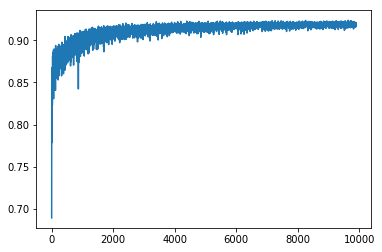

In [105]:
plt.plot(scores)

In [27]:
print("Classification report: \n\n%s\n"
      % (classification_report(y_validate, y_predict)))

Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.89      0.98      0.94      1135
           2       0.91      0.85      0.88      1032
           3       0.87      0.88      0.87      1010
           4       0.78      0.95      0.86       982
           5       0.85      0.79      0.82       892
           6       0.94      0.91      0.92       958
           7       0.83      0.93      0.88      1028
           8       0.90      0.74      0.81       974
           9       0.92      0.75      0.82      1009

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




# Company A observes relatively few 4, 8   

But what if we do not have a balanced dataset? 

(array([5923., 6742., 5958., 6131., 1169., 5421., 5918., 6265., 1171.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

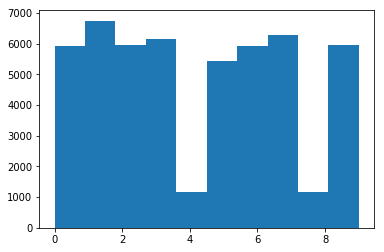

In [32]:
X_A,y_A,classes = read_training_data(remove_digits={4:0.8,8:0.8})
plt.hist(y_A)

In [33]:
clf = SGDClassifier(max_iter=10)
clf.fit(X_A,y_A)
y_predict = clf.predict(X_validate)
print("Classification report: \n\n%s\n"
      % (classification_report(y_validate, y_predict)))

Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.95      0.98      0.97      1135
           2       0.89      0.91      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.95      0.81      0.87       982
           5       0.75      0.91      0.82       892
           6       0.94      0.93      0.93       958
           7       0.94      0.90      0.92      1028
           8       0.92      0.66      0.77       974
           9       0.79      0.92      0.85      1009

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000




# Company B observes relatively few 2, 5 

(array([5923., 6742., 1192., 6131., 5842., 1085., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

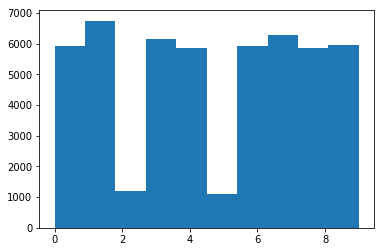

In [34]:
X_B,y_B,classes = read_training_data(remove_digits={5:0.8,2:0.8})
plt.hist(y_B)

In [35]:
clf = SGDClassifier(max_iter=100)
clf.fit(X_B,y_B)
y_predict = clf.predict(X_validate)
print("Classification report: \n\n%s\n"
      % (classification_report(y_validate, y_predict)))

Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.94      0.98      0.96      1135
           2       0.96      0.75      0.84      1032
           3       0.80      0.93      0.86      1010
           4       0.86      0.96      0.90       982
           5       0.97      0.65      0.78       892
           6       0.92      0.97      0.94       958
           7       0.91      0.93      0.92      1028
           8       0.78      0.91      0.84       974
           9       0.93      0.86      0.89      1009

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000




# Using the federated alliance model

First we authenticate with the the alliance:

In [28]:
from scaleout.runtime.runtime import Runtime
runtime = Runtime()
runtime.alliance.attach()

setting default values where needed
attaching to alliance d680b683-d762-4001-9a85-9d7ca73d0b5e


We are now able to download the latest global model from the model repository 

In [29]:
global_model, meta = runtime.alliance.get_global_model()
y_predict = global_model.predict(X_validate)
print("Classification report: \n\n%s\n"
      % (classification_report(y_validate, y_predict)))

Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       980
           1       0.92      0.99      0.95      1135
           2       0.85      0.91      0.88      1032
           3       0.92      0.80      0.85      1010
           4       0.99      0.56      0.71       982
           5       0.55      0.94      0.70       892
           6       0.89      0.93      0.91       958
           7       0.89      0.91      0.90      1028
           8       0.97      0.50      0.66       974
           9       0.73      0.90      0.81      1009

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.87      0.84      0.83     10000
weighted avg       0.87      0.84      0.84     10000


